# Uncertainty Analysis

In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_excel("UncertaintyAnalysis.xlsx", sheet_name = "Pandas")

In [7]:
df = df.dropna()

In [8]:
import matplotlib.pyplot as plt

In [15]:
df["F0"] = 1
df["F1"] = df["x"]
df["F2"] = df["x"]**2
df["A0"] = df["F0"]/df["dely"]
df["A1"] = df["F1"]/df["dely"]
df["A2"] = df["F2"]/df["dely"]
df["b"] = df["y"]/df["dely"]
df

,x,y,dely,F0,F1,F2,A0,A1,A2,b
0,4.70,46.120056,4.112259,1,4.70,22.0900,0.243175,1.142924,5.371743,11.215259
1,6.25,43.347470,4.017330,1,6.25,39.0625,0.248922,1.555760,9.723497,10.790118
2,7.55,43.268289,4.005193,1,7.55,57.0025,0.249676,1.885053,14.232147,10.803046
3,8.45,48.561254,4.160062,1,8.45,71.4025,0.240381,2.031220,17.163805,11.673203
4,9.60,45.369061,4.026332,1,9.60,92.1600,0.248365,2.384304,22.889322,11.268089
5,10.45,37.567380,3.799702,1,10.45,109.2025,0.263179,2.750216,28.739753,9.886928
6,11.25,42.306131,3.899174,1,11.25,126.5625,0.256465,2.885227,32.458801,10.850025
7,12.70,39.335224,3.783925,1,12.70,161.2900,0.264276,3.356303,42.625052,10.395350
8,14.10,39.031069,3.751258,1,14.10,198.8100,0.266577,3.758739,52.998221,10.404795
9,15.55,41.386800,3.804072,1,15.55,241.8025,0.262876,4.087725,63.564126,10.879605


In [21]:
A = np.array(df[["A0","A1","A2"]])
b = np.array(df["b"])

In [24]:
C = np.linalg.inv(A.transpose().dot(A))
a = C.dot(A.transpose().dot(b))
a

array([ 4.52898380e+01, -1.37253647e-01, -8.45960848e-03])

In [25]:
def get_y(row, a):
    F0 = row["F0"]
    F1 = row["F1"]
    F2 = row["F2"]
    F = np.array([F0, F1, F2])
    return F.dot(a)

df["ycalc"] = df.apply(get_y, axis = 1, args=(a,))

In [26]:
df

,x,y,dely,F0,F1,F2,A0,A1,A2,b,ycalc
0,4.70,46.120056,4.112259,1,4.70,22.0900,0.243175,1.142924,5.371743,11.215259,44.457873
1,6.25,43.347470,4.017330,1,6.25,39.0625,0.248922,1.555760,9.723497,10.790118,44.101549
2,7.55,43.268289,4.005193,1,7.55,57.0025,0.249676,1.885053,14.232147,10.803046,43.771354
3,8.45,48.561254,4.160062,1,8.45,71.4025,0.240381,2.031220,17.163805,11.673203,43.526008
4,9.60,45.369061,4.026332,1,9.60,92.1600,0.248365,2.384304,22.889322,11.268089,43.192566
5,10.45,37.567380,3.799702,1,10.45,109.2025,0.263179,2.750216,28.739753,9.886928,42.931727
6,11.25,42.306131,3.899174,1,11.25,126.5625,0.256465,2.885227,32.458801,10.850025,42.675065
7,12.70,39.335224,3.783925,1,12.70,161.2900,0.264276,3.356303,42.625052,10.395350,42.182266
8,14.10,39.031069,3.751258,1,14.10,198.8100,0.266577,3.758739,52.998221,10.404795,41.672707
9,15.55,41.386800,3.804072,1,15.55,241.8025,0.262876,4.087725,63.564126,10.879605,41.109989


In [27]:
def get_delycalc(row, a, C):
    F0 = row["F0"]
    F1 = row["F1"]
    F2 = row["F2"]
    F = np.array([F0, F1, F2])
    dely2 = F.dot(C.dot(F))
    return np.sqrt(dely2)

In [32]:
df["delycalc"] = df.apply(get_delycalc, axis=1, args=(a, C))

In [31]:
row = df.iloc[3]
row["F0"]

1.0

In [33]:
df

,x,y,dely,F0,F1,F2,A0,A1,A2,b,ycalc,delycalc
0,4.70,46.120056,4.112259,1,4.70,22.0900,0.243175,1.142924,5.371743,11.215259,44.457873,2.403029
1,6.25,43.347470,4.017330,1,6.25,39.0625,0.248922,1.555760,9.723497,10.790118,44.101549,1.885618
2,7.55,43.268289,4.005193,1,7.55,57.0025,0.249676,1.885053,14.232147,10.803046,43.771354,1.545660
3,8.45,48.561254,4.160062,1,8.45,71.4025,0.240381,2.031220,17.163805,11.673203,43.526008,1.367229
4,9.60,45.369061,4.026332,1,9.60,92.1600,0.248365,2.384304,22.889322,11.268089,43.192566,1.212003
5,10.45,37.567380,3.799702,1,10.45,109.2025,0.263179,2.750216,28.739753,9.886928,42.931727,1.148560
6,11.25,42.306131,3.899174,1,11.25,126.5625,0.256465,2.885227,32.458801,10.850025,42.675065,1.123459
7,12.70,39.335224,3.783925,1,12.70,161.2900,0.264276,3.356303,42.625052,10.395350,42.182266,1.138491
8,14.10,39.031069,3.751258,1,14.10,198.8100,0.266577,3.758739,52.998221,10.404795,41.672707,1.188552
9,15.55,41.386800,3.804072,1,15.55,241.8025,0.262876,4.087725,63.564126,10.879605,41.109989,1.240945


#  Using curve_fit

In [34]:
import scipy.optimize as scopt

In [35]:
df = pd.read_excel("UncertaintyAnalysis.xlsx",sheet_name = "Pandas")
df = df.dropna()
df

,x,y,dely
0,4.70,46.120056,4.112259
1,6.25,43.347470,4.017330
2,7.55,43.268289,4.005193
3,8.45,48.561254,4.160062
4,9.60,45.369061,4.026332
5,10.45,37.567380,3.799702
6,11.25,42.306131,3.899174
7,12.70,39.335224,3.783925
8,14.10,39.031069,3.751258
9,15.55,41.386800,3.804072


In [65]:
def get_ycalc(x, a0, a1, a2):
    y = a0 + a1*x + a2*x**2
    return y

def get_dely(x, C):
    F = np.array([1, x, x**2])
    dely2 = F.dot(C.dot(F))
    return np.sqrt(dely2)

In [66]:
afit, C = scopt.curve_fit(get_ycalc, 
                          df["x"], df["y"], 
                             sigma = df["dely"])


In [67]:
a, afit

(array([ 4.52898380e+01, -1.37253647e-01, -8.45960848e-03]),
 array([ 4.52898420e+01, -1.37254179e-01, -8.45959387e-03]))

In [68]:
C

array([[ 1.56156836e+01, -1.87540065e+00,  4.83825227e-02],
       [-1.87540065e+00,  2.47945256e-01, -6.71340082e-03],
       [ 4.83825227e-02, -6.71340082e-03,  1.87950007e-04]])

In [71]:
x = np.linspace(0, 50, 1000)
y = get_ycalc(x, *a)
dely = get_dely(x, C)
yplus = y+dely
yminus = y-dely
plt.plot(df["x"],df["y"],"ro")
plt.fill_between(x, yplus, y2=yminus, color="cyan")
plt.plot(x, y, 'b')

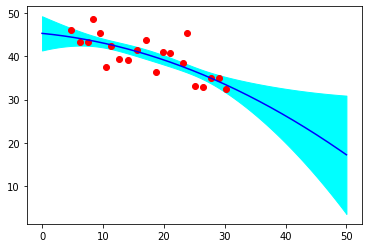